In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def create_graph(path):

    G = nx.read_edgelist(path, comments='#', nodetype=int)

    num_edges = len(G.edges)
    print('num_edges = ',num_edges)
    num_nodes = len(G.nodes)
    print('num_nodes = ',num_nodes)
    average_degree = (num_edges * 2) / num_nodes
    print('average_degree = ',average_degree)
    density = nx.density(G)
    print('density = ',density) 
    

In [5]:
path = 'datasets\\friendships-hamster.txt'
G = nx.read_edgelist(path, comments='#', nodetype=int)

In [ ]:
nx.community.louvain_communities(G, seed=123)

In [34]:
communities_generator = nx.community.louvain_partitions(G, seed=123)
for c in communities_generator:
    print(nx.community.modularity(G,c))

0.4255443798262059
0.44864608762013214
0.4498195831226095


In [27]:
c = nx.community.louvain_communities(G, seed=123)
nx.community.modularity(G,c)

0.4498195831226095

In [28]:
c = nx.community.greedy_modularity_communities(G)
nx.community.modularity(G,c)

0.39115511664344504

In [35]:
path = 'datasets\\facebook_combined.txt'
G2 = nx.read_edgelist(path, comments='#', nodetype=int)

communities_generator = nx.community.louvain_partitions(G2, seed=123)
for c in communities_generator:
    print(nx.community.modularity(G2,c))

0.8111943038526382
0.8338350588794711
0.8349405290865816


In [36]:
path = 'datasets\\Cit-HepTh.txt'
G3 = nx.read_edgelist(path, comments='#', nodetype=int)

communities_generator = nx.community.louvain_partitions(G, seed=123)
for c in communities_generator:
    print(nx.community.modularity(G,c))

0.4255443798262059
0.44864608762013214
0.4498195831226095


In [46]:
path = 'datasets\\friendships-hamster.txt'
G = nx.read_edgelist(path, comments='#', nodetype=int)
C = nx.community.louvain_communities(G, seed=123)
nx.community.modularity(G,C)

0.4498195831226095

In [47]:
len(C)

34

In [ ]:
for c in C:
    print(c)

In [94]:
path = 'datasets\\friendships-hamster.txt'
G = nx.read_edgelist(path, comments='#', nodetype=int)
C = nx.community.louvain_communities(G, seed=123)
nx.community.modularity(G,C)

communities = {}
for community_id,nodes in enumerate(C):
    communities[community_id] = [*list(nodes)]

# Calculate the size of each community
community_sizes = [len(nodes) for nodes in communities.values()]

In [ ]:
communities

In [106]:
for community_id, nodes in communities.items():
    print(community_id)
    print(len(nodes))
    break

0
4


In [108]:
# Create a new graph to represent the communities
communities_graph = nx.Graph()

# Create a node for each community
for community_id, nodes in communities.items():
    communities_graph.add_node(community_id, size=len(nodes))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


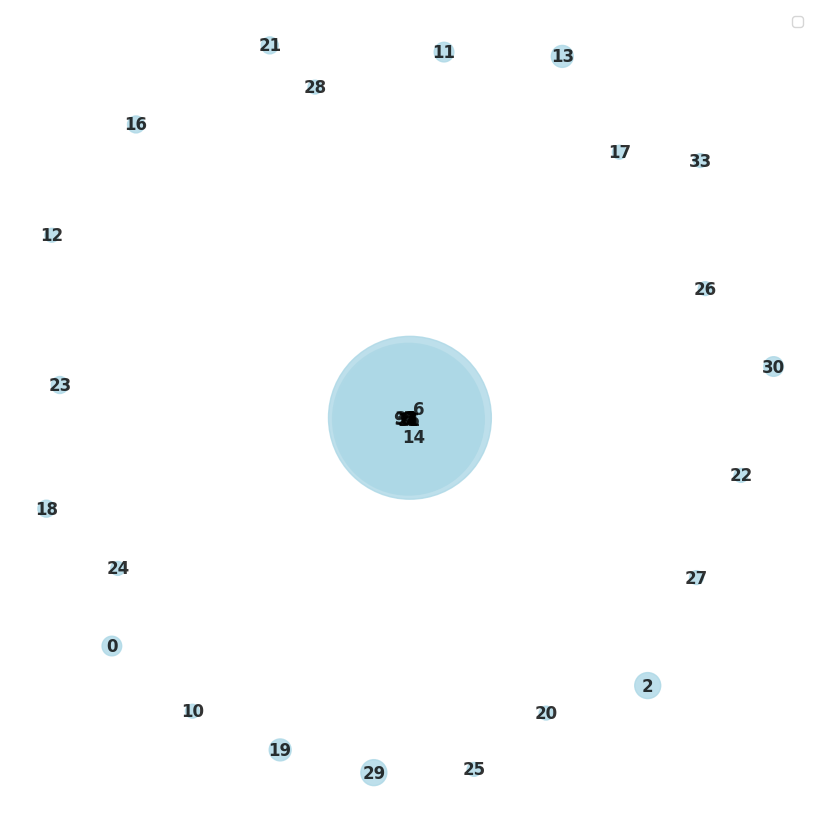

In [114]:
# Add edges between communities based on the original graph edges
for u, v in G.edges:
    for community_id, nodes in communities.items():
        if u in nodes:
            u_community = community_id
        if v in nodes:
            v_community = community_id
    if u_community != v_community:
        if communities_graph.has_edge(u_community, v_community):
            communities_graph[u_community][v_community]['weight'] += 1
        else:
            communities_graph.add_edge(u_community, v_community, weight=1)

# Visualize the communities
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(communities_graph)

node_sizes = [communities_graph.nodes[community_id]['size']*50 for community_id in communities_graph.nodes()]
nx.draw(communities_graph, pos, with_labels=True, node_size=node_sizes, node_color='lightblue',
        font_size=12, font_weight='bold', alpha=0.8, width=2)

plt.legend()
plt.axis('off')
plt.show()

num_edges =  12534
num_nodes =  1858
number of communities =  35
modularity =  0.4529632328103304


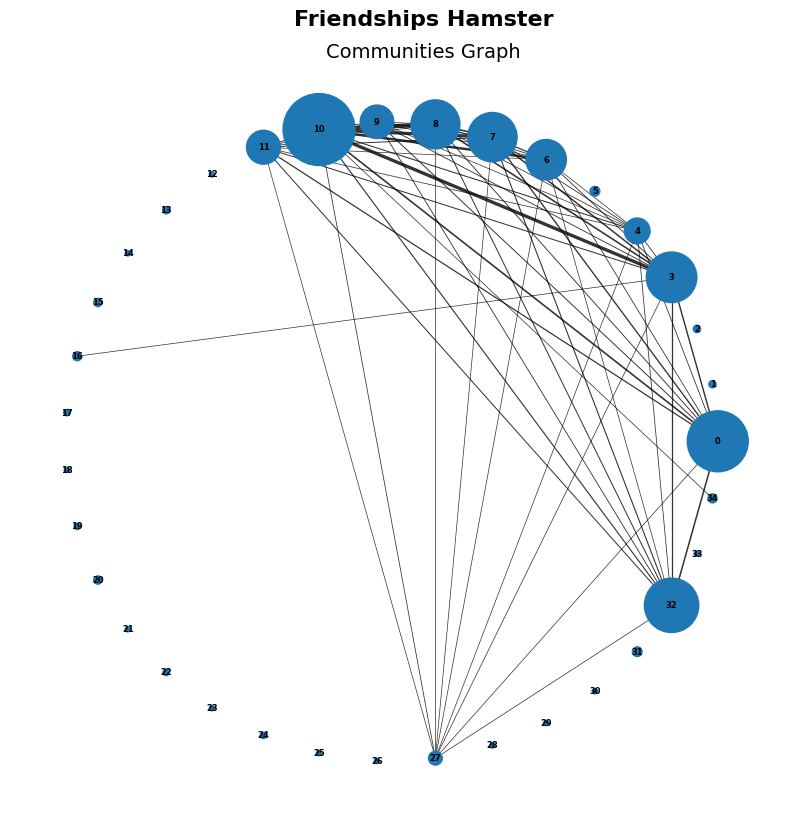

In [33]:
path = 'datasets\\friendships-hamster.txt'
G = nx.read_edgelist(path, comments='#', nodetype=int)
num_edges = len(G.edges)
print('num_edges = ',num_edges)
num_nodes = len(G.nodes)
print('num_nodes = ',num_nodes)


C = nx.community.louvain_communities(G, seed=1984)
modularity = nx.community.modularity(G, C)
print('number of communities = ',len(C))
print('modularity = ',modularity)


communities = {}
for community_id, nodes in enumerate(C):
    communities[community_id] = [*list(nodes)]

# Create a new graph to represent the communities and their links
communities_graph = nx.Graph()

# Add nodes for each community
for community_id, nodes in communities.items():
    communities_graph.add_node(community_id, size=len(nodes))

# Add links between communities based on the original graph edges
for u, v in G.edges:
    u_community = None
    v_community = None
    for community_id, nodes in communities.items():
        if u in nodes:
            u_community = community_id
        if v in nodes:
            v_community = community_id
    if u_community != v_community:
        if communities_graph.has_edge(u_community, v_community):
            communities_graph[u_community][v_community]['weight'] += 1
        else:
            communities_graph.add_edge(u_community, v_community, weight=1)

# Visualize the communities and links
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(communities_graph)
#pos = nx.random_layout(communities_graph, seed=120)

node_sizes = [communities_graph.nodes[community_id]['size'] * 7 for community_id in communities_graph.nodes()]
edge_weights = [communities_graph[u][v]['weight'] for u, v in communities_graph.edges()]
edge_widths = [0.5 + 2.5 * w / max(edge_weights) for w in edge_weights]
nx.draw_networkx_nodes(communities_graph, pos, node_size=node_sizes)
nx.draw_networkx_edges(communities_graph, pos, width=edge_widths, alpha=0.8)

nx.draw_networkx_labels(communities_graph, pos, font_size=6, font_weight='bold')
plt.text(-0.3, 1.3, 'Friendships Hamster', fontsize=16, fontweight='bold')
plt.text(-0.20, 1.2, 'Communities Graph', fontsize=14)
plt.axis('off')
plt.show()

In [38]:
a = sorted(communities.items(), key=lambda x: x[1], reverse=True)
for i , j in a:
    print(i)
    print(j)
    break

14
[1816, 1815]


In [54]:
print('5 Big Communities : \n')
sorted_communities = sorted(communities.items(), key=lambda x: len(x[1]), reverse=True)
for community , nodes in sorted_communities[:5]:
    print(f"community = {community:3.0f} \t length = {len(nodes):4.0f}")
    #print('community = ',community,'\t','length = ',len(nodes))

    

5 Big Communities : 

community =  10 	 length =  383
community =   0 	 length =  275
community =  32 	 length =  219
community =   3 	 length =  189
community =   7 	 length =  180
